In [69]:
import xgboost
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load the data and make new df
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
enc_train = train[['bin_0','bin_1','bin_2']]
enc_test = test[['bin_0','bin_1','bin_2']]
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [70]:
train.shape

(300000, 25)

In [71]:
#nom_0 analysis
train.ord_5.value_counts()

od    5019
fO    3435
Zq    2926
sD    2880
qP    2854
Xi    2840
Gb    2824
TZ    2798
Bd    2771
on    2764
ac    2758
uS    2757
ek    2740
CZ    2735
Eg    2700
PQ    2688
tP    2674
Qo    2654
gJ    2633
AP    2614
Xh    2613
hp    2612
bF    2603
kW    2590
Jc    2572
nh    2543
ri    2538
Ed    2523
cA    2510
UO    2508
      ... 
IK     499
OR     494
Os     479
us     436
wy     436
ud     421
dE     421
Ps     414
Ry     359
DH     315
av     313
Mf     285
jS     260
dB     246
hL     213
oH     184
ux     169
pa     151
Kf     144
cG     124
jp      84
Jf      76
xP      76
Id      66
qJ      65
eg      47
tv      40
kU      37
vq      35
Cl      28
Name: ord_5, Length: 192, dtype: int64

In [72]:
# add the one hot encoded weights to the enc_train
from sklearn.preprocessing import OneHotEncoder
hot_cols = ['nom_0','nom_1','nom_2','nom_3', 'nom_4']
encoder = OneHotEncoder()
noms04 = encoder.fit_transform(train[hot_cols]).toarray()

for i in range(len(encoder.get_feature_names())):
    enc_train[encoder.get_feature_names()[i]] = noms04[:,i]
enc_train.head()

/home/trent/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,bin_0,bin_1,bin_2,x0_Blue,x0_Green,x0_Red,x1_Circle,x1_Polygon,x1_Square,x1_Star,...,x3_Canada,x3_China,x3_Costa Rica,x3_Finland,x3_India,x3_Russia,x4_Bassoon,x4_Oboe,x4_Piano,x4_Theremin
0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [73]:

noms04 = encoder.fit_transform(test[hot_cols]).toarray()

for i in range(len(encoder.get_feature_names())):
    enc_test[encoder.get_feature_names()[i]] = noms04[:,i]
enc_test.head()

/home/trent/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,bin_0,bin_1,bin_2,x0_Blue,x0_Green,x0_Red,x1_Circle,x1_Polygon,x1_Square,x1_Star,...,x3_Canada,x3_China,x3_Costa Rica,x3_Finland,x3_India,x3_Russia,x4_Bassoon,x4_Oboe,x4_Piano,x4_Theremin
0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [74]:
#see if nom_5 can be encoded
len(train['nom_5'].value_counts())

222

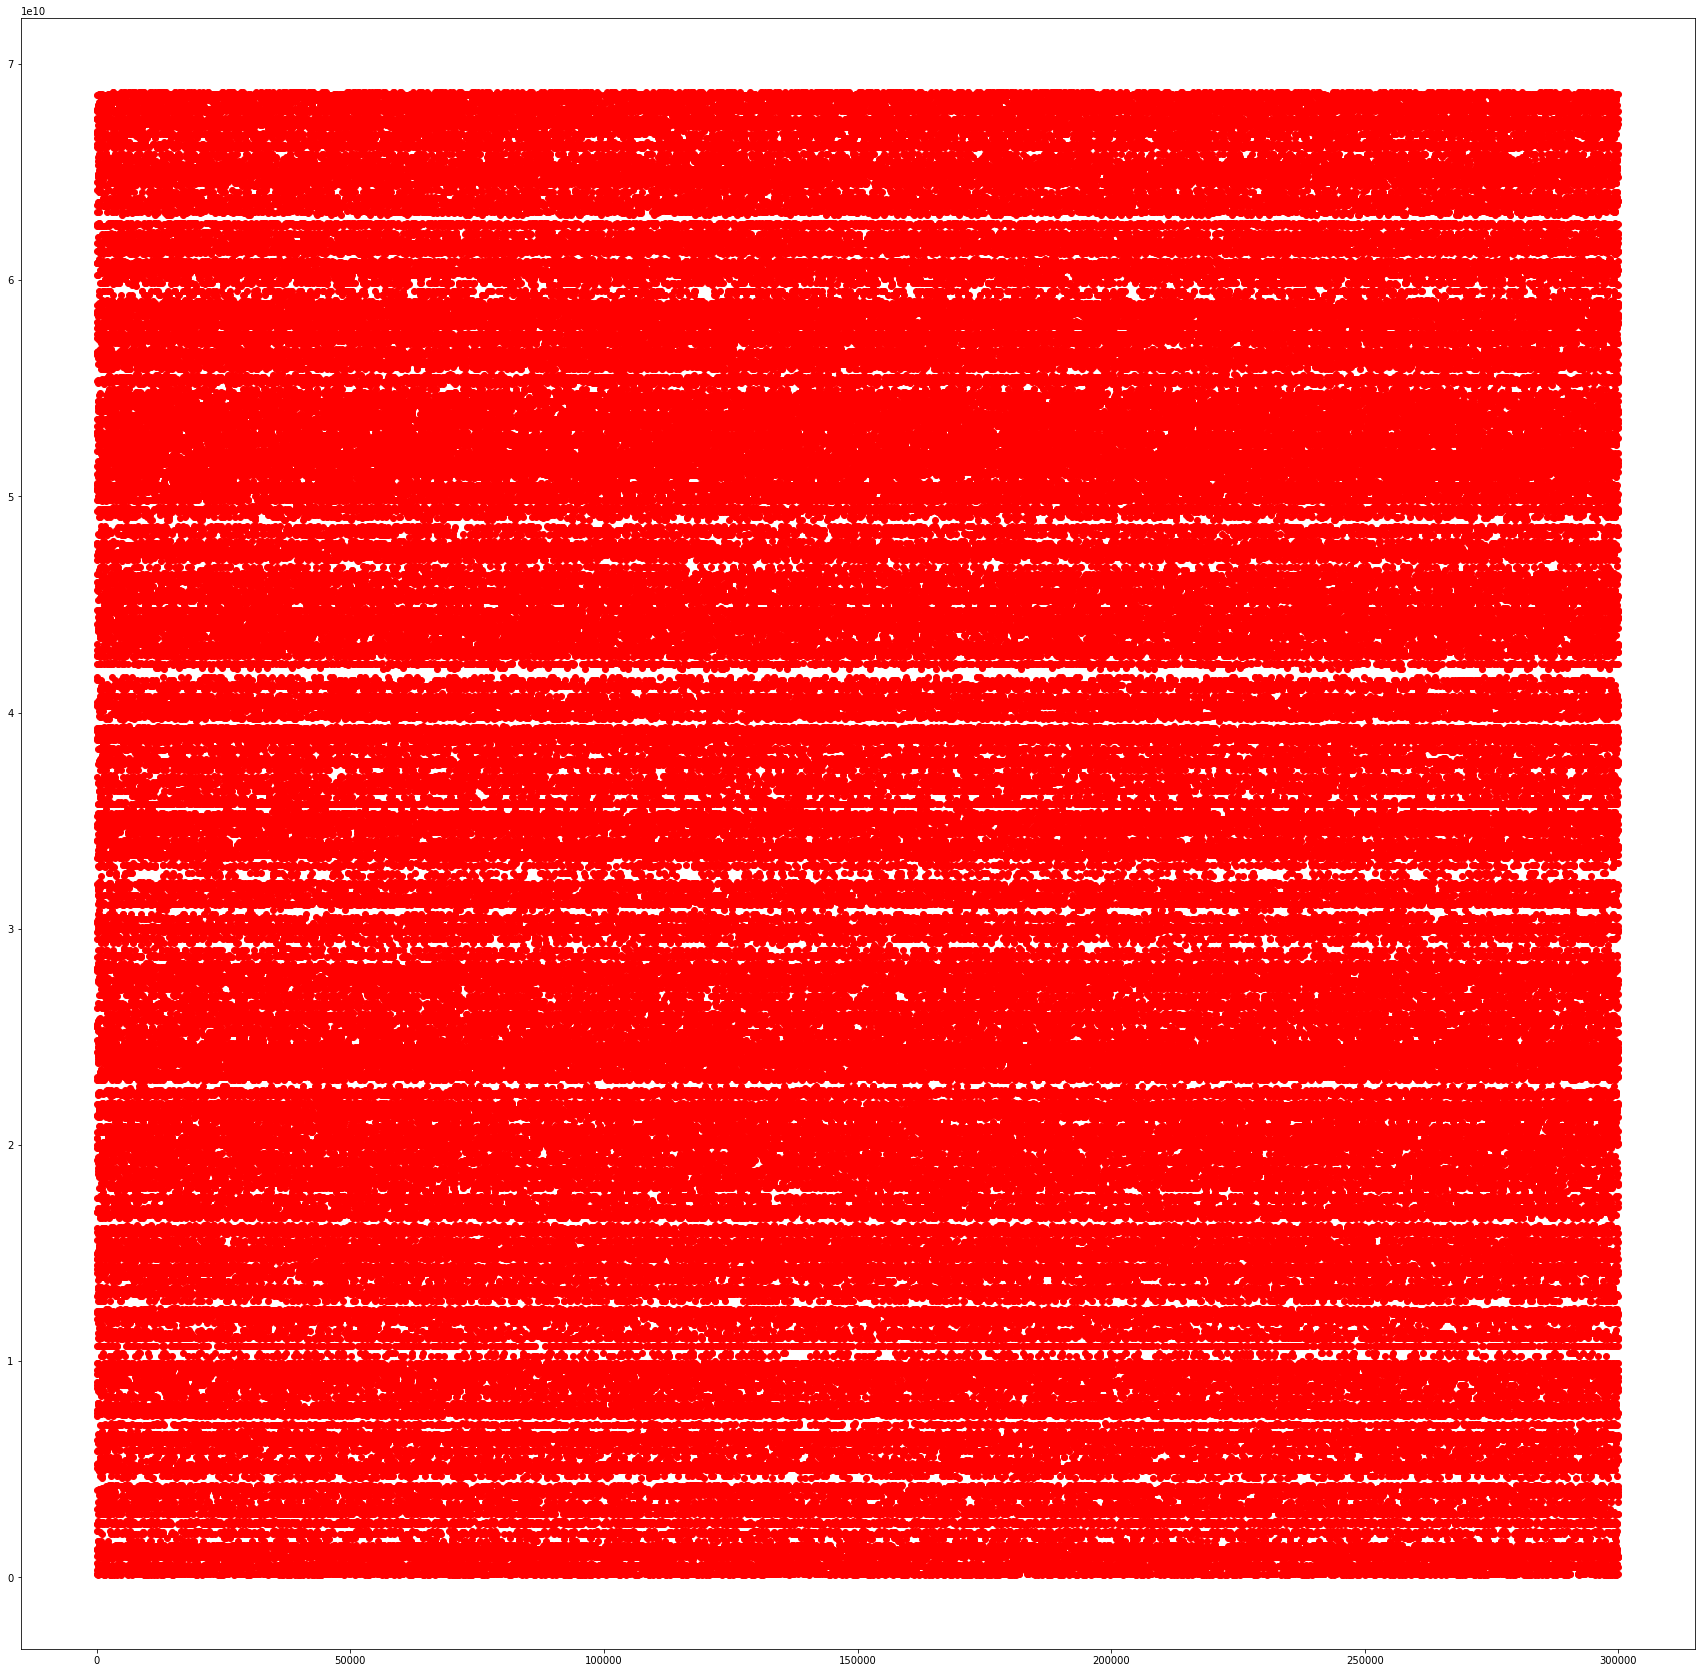

In [75]:
#do some analyisis on nom_5
temp = []
for i in train['nom_7']:
    temp.append(int(i,16))
plt.figure(figsize=(30,30))
plt.plot(range(len(temp)),temp,'ro')
plt.show()

In [76]:
#investigate  cluster pattern of nom_5
"""from sklearn.cluster import KMeans
from tqdm import tqdm
temp = []
hex5 = [[int(i,16)] for i in train['nom_5']]
colors = ['ro','go','yo','ko','bo','mo','co']
for i in tqdm(range(50)):
    km = KMeans(i+52,n_jobs=10)
    km.fit(hex5)
    temp.append(km.score(hex5))
    temp2x = []
    temp2y = []
    preds = km.predict(hex5)
    plt.figure(figsize=(30,30))
    for clust in range(i+52):
        for point in range(len(preds)):
            if preds[point] == clust:
                temp2y.append(hex5[point])
                temp2x.append(point)
        plt.plot(temp2x,temp2y,colors[clust%len(colors)])
        temp2y =[]
        temp2x = []
    plt.savefig('nom5cluster'+str(i+52)+'.png')
    plt.clf()
    km = None
"""

"from sklearn.cluster import KMeans\nfrom tqdm import tqdm\ntemp = []\nhex5 = [[int(i,16)] for i in train['nom_5']]\ncolors = ['ro','go','yo','ko','bo','mo','co']\nfor i in tqdm(range(50)):\n    km = KMeans(i+52,n_jobs=10)\n    km.fit(hex5)\n    temp.append(km.score(hex5))\n    temp2x = []\n    temp2y = []\n    preds = km.predict(hex5)\n    plt.figure(figsize=(30,30))\n    for clust in range(i+52):\n        for point in range(len(preds)):\n            if preds[point] == clust:\n                temp2y.append(hex5[point])\n                temp2x.append(point)\n        plt.plot(temp2x,temp2y,colors[clust%len(colors)])\n        temp2y =[]\n        temp2x = []\n    plt.savefig('nom5cluster'+str(i+52)+'.png')\n    plt.clf()\n    km = None\n"

In [77]:
#find best cluster value for noms to encode
"""noms = ['nom_5','nom_6','nom_7','nom_9']
testhexnom =[[int(test[nom][i],16) for nom in noms] for i in range(len(test.nom_5))]
hexnom = [[int(train[nom][i],16) for nom in noms] for i in range(len(train.nom_5))]
temp = []
for i in tqdm(range(100)):
    km = KMeans(i+52,n_jobs=10)
    km.fit(testhexnom)
    temp.append(km.score(testhexnom))
    km = None
plt.plot(temp)
plt.show()"""

"noms = ['nom_5','nom_6','nom_7','nom_9']\ntesthexnom =[[int(test[nom][i],16) for nom in noms] for i in range(len(test.nom_5))]\nhexnom = [[int(train[nom][i],16) for nom in noms] for i in range(len(train.nom_5))]\ntemp = []\nfor i in tqdm(range(100)):\n    km = KMeans(i+52,n_jobs=10)\n    km.fit(testhexnom)\n    temp.append(km.score(testhexnom))\n    km = None\nplt.plot(temp)\nplt.show()"

In [78]:
#encode noms in train
encoder = OneHotEncoder()
#fit everything for test data
km = KMeans(20,n_jobs=10)
km.fit(testhexnom)
encoder.fit([[i] for i in km.predict(testhexnom)])

#encode the test data
pred = km.predict(hexnom)
enc = encoder.transform([[i] for i in pred]).toarray()
for i in range(len(encoder.get_feature_names())):
    enc_train[encoder.get_feature_names()[i]] = enc[:,i]
enc_test.head()

/home/trent/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,bin_0,bin_1,bin_2,x0_Blue,x0_Green,x0_Red,x1_Circle,x1_Polygon,x1_Square,x1_Star,...,x3_Canada,x3_China,x3_Costa Rica,x3_Finland,x3_India,x3_Russia,x4_Bassoon,x4_Oboe,x4_Piano,x4_Theremin
0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
#encode noms in test

pred = km.predict(testhexnom)
enc = encoder.transform([[i] for i in pred]).toarray()
for i in range(len(encoder.get_feature_names())):
    enc_test[encoder.get_feature_names()[i]] = enc[:,i]
enc_test.head()

,bin_0,bin_1,bin_2,x0_Blue,x0_Green,x0_Red,x1_Circle,x1_Polygon,x1_Square,x1_Star,...,x0_10.0,x0_11.0,x0_12.0,x0_13.0,x0_14.0,x0_15.0,x0_16.0,x0_17.0,x0_18.0,x0_19.0
0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
##see distribution of ords
ords = ['ord_0','ord_1','ord_2','ord_3','ord_4','ord_5']
for ordt in ords:
    print(ordt,len(test[ordt].value_counts()))


ord_0 3
ord_1 5
ord_2 6
ord_3 15
ord_4 26
ord_5 192


In [82]:
#add one hot ords excpet too big one
hot_cols = ords[:len(ords)-1]

for col in hot_cols:
    test_col = [[i] for i in test[col]]
    train_col = [[i] for i in train[col]]
    encoder = OneHotEncoder()
    encoder.fit(test_col)
    encs = encoder.transform(train_col).toarray()

    
    for i in range(len(encoder.get_feature_names())):
        enc_train[encoder.get_feature_names()[i]] = encs[:,i]

    encs = encoder.transform(test_col).toarray()

    for i in range(len(encoder.get_feature_names())):
        enc_test[encoder.get_feature_names()[i]] = encs[:,i]
    
enc_test.head()

/home/trent/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,bin_0,bin_1,bin_2,x0_Blue,x0_Green,x0_Red,x1_Circle,x1_Polygon,x1_Square,x1_Star,...,x0_Q,x0_R,x0_S,x0_T,x0_U,x0_V,x0_W,x0_X,x0_Y,x0_Z
0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [83]:
inds = list(train.ord_5.value_counts().index)

In [84]:
#add last ord normally
enc_test[ords[-1]] = [inds.index(i) for i in test.ord_5]
enc_train[ords[-1]] = [inds.index(i) for i in train.ord_5]

In [85]:
#add day month
enc_train['day']= train.day
enc_train['month']= train.month
enc_test['day']= test.day
enc_test['month']= test.month

In [92]:
enc_test.head()

,bin_0,bin_1,bin_2,x0_Blue,x0_Green,x0_Red,x1_Circle,x1_Polygon,x1_Square,x1_Star,...,x0_T,x0_U,x0_V,x0_W,x0_X,x0_Y,x0_Z,ord_5,day,month
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40,5,11
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,97,7,5
2,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,16,1,12
3,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,50,2,3
4,0,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,130,4,11


In [91]:
enc_train = enc_train.astype('int64')
enc_test = enc_test.astype('int64')

In [94]:
#et feature importances
from lightgbm import LGBMClassifier
import eli5
from eli5.sklearn import PermutationImportance

lg = LGBMClassifier(n_jobs=10)
lg.fit(enc_train, train.target)

perm = PermutationImportance(lg).fit(enc_train, train.target)
eli5.explain_weights(perm)


TypeError: Unexpected feature_names type

In [95]:
eli5.explain_weights(perm)


Weight,Feature
0.0072 ± 0.0004,x102
0.0066 ± 0.0007,x100
0.0062 ± 0.0002,x3
0.0061 ± 0.0003,x55
0.0061 ± 0.0004,x52
0.0057 ± 0.0004,x57
0.0055 ± 0.0005,x1
0.0047 ± 0.0004,x50
0.0047 ± 0.0004,x24
0.0035 ± 0.0002,x29


In [96]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
def get_tuned_xgb(x,y): 
    # A parameter grid for XGBoost
    params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators=100' : [50, 100, 200, 300, 500, 800, 1000]
        }
    
    xgb = XGBClassifier(objective='binary:logistic')

    folds = 5
    param_comb = 15
    skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
    random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=8, cv=skf.split(x,y), verbose=2, random_state=1001 )

    random_search.fit(x,y)
    print(random_search.best_score_)
    return XGBClassifier(**random_search.best_params_)
 
    

In [97]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
def get_tuned_lgbm(x,y): 
    # A parameter grid for XGBoost
    params = {'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
    
    lg = LGBMClassifier(objective='binary')

    folds = 5
    param_comb = 15
    skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
    random_search = RandomizedSearchCV(lg, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=8, cv=skf.split(x,y), verbose=1, random_state=1001 )

    random_search.fit(x,y)
    print(random_search.best_score_)
    return LGBMClassifier(**random_search.best_params_)


In [98]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
def get_tuned_cat(x,y): 
    # A parameter grid for XGBoost
    params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[2,50,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'thread_count':[4],
              'loss_function': ['Logloss', 'CrossEntropy']}
    
    cat = CatBoostClassifier(eval_metric = 'AUC')

    folds = 5
    param_comb = 15
    skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
    random_search = RandomizedSearchCV(cat, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=8, cv=skf.split(x,y), verbose=1, random_state=1001 )

    random_search.fit(x,y)
    print(random_search.best_score_)
    return CatBoostClassifier(**random_search.best_params_)


In [100]:
tcat = get_tuned_cat(enc_train,train.target)
tlg = get_tuned_lgbm(enc_train,train.target)
txgb = get_tuned_xgb(enc_train,train.target)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_auc_score
class Ensamble:
    def __init__(self, models, weights=None):
        if weights == None:
            weights = [i/len(models) for i in range(len(models))]
        self.weights = weights
        self.models = models
    
    def predict(self, x):
        guesses = []
        for model in self.models:
            guesses.append(model.predict(x))
        output = np.zeros(guesses[0].shape)
        for i in range(len(self.weights)):
            output += self.weights[i]*guesses[i]
        return output
    def fit(self,x,y):
        for model in self.models:
            model.fit(x,y)
    def score(self, x,y):
        return roc_auc_score(y, self.redict(x,y))
ens = Ensamble([tcat,tlg,txgb])
ens.fit(enc_train,train.target)


In [141]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)
scores = []
for i in tqdm(range(5)):
    result = next(kf.split(enc_train), None)
    x_train = enc_train.iloc[result[0]]
    x_test = enc_train.iloc[result[1]]
    y_train = train.target.iloc[result[0]]
    y_test =  train.target.iloc[result[1]]
    model = ens.fit(x_train,y_train)
    predictions = ens.predict(x_test)
    scores.append(ens.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))





  0%|          | 0/5 [00:00<?, ?it/s]

0:	learn: 0.6561313	total: 40.9ms	remaining: 20.4s
1:	learn: 0.6328775	total: 81.2ms	remaining: 20.2s
2:	learn: 0.6172029	total: 120ms	remaining: 19.9s
3:	learn: 0.6064100	total: 157ms	remaining: 19.5s
4:	learn: 0.5990196	total: 198ms	remaining: 19.6s
5:	learn: 0.5934249	total: 230ms	remaining: 18.9s
6:	learn: 0.5892434	total: 270ms	remaining: 19s
7:	learn: 0.5865773	total: 313ms	remaining: 19.3s
8:	learn: 0.5837832	total: 357ms	remaining: 19.5s
9:	learn: 0.5817322	total: 389ms	remaining: 19.1s
10:	learn: 0.5801872	total: 420ms	remaining: 18.7s
11:	learn: 0.5785864	total: 450ms	remaining: 18.3s
12:	learn: 0.5771317	total: 483ms	remaining: 18.1s
13:	learn: 0.5758678	total: 524ms	remaining: 18.2s
14:	learn: 0.5746782	total: 555ms	remaining: 17.9s
15:	learn: 0.5736136	total: 593ms	remaining: 17.9s
16:	learn: 0.5726977	total: 626ms	remaining: 17.8s
17:	learn: 0.5718127	total: 662ms	remaining: 17.7s
18:	learn: 0.5709088	total: 701ms	remaining: 17.7s
19:	learn: 0.5700243	total: 747ms	remaini

165:	learn: 0.5397128	total: 6.24s	remaining: 12.5s
166:	learn: 0.5396855	total: 6.27s	remaining: 12.5s
167:	learn: 0.5396468	total: 6.31s	remaining: 12.5s
168:	learn: 0.5396199	total: 6.34s	remaining: 12.4s
169:	learn: 0.5395877	total: 6.37s	remaining: 12.4s
170:	learn: 0.5395559	total: 6.41s	remaining: 12.3s
171:	learn: 0.5395308	total: 6.44s	remaining: 12.3s
172:	learn: 0.5394955	total: 6.48s	remaining: 12.3s
173:	learn: 0.5394659	total: 6.53s	remaining: 12.2s
174:	learn: 0.5394338	total: 6.57s	remaining: 12.2s
175:	learn: 0.5394021	total: 6.6s	remaining: 12.2s
176:	learn: 0.5393748	total: 6.63s	remaining: 12.1s
177:	learn: 0.5393511	total: 6.67s	remaining: 12.1s
178:	learn: 0.5393240	total: 6.71s	remaining: 12s
179:	learn: 0.5392934	total: 6.74s	remaining: 12s
180:	learn: 0.5392685	total: 6.78s	remaining: 11.9s
181:	learn: 0.5392412	total: 6.81s	remaining: 11.9s
182:	learn: 0.5392108	total: 6.85s	remaining: 11.9s
183:	learn: 0.5391820	total: 6.88s	remaining: 11.8s
184:	learn: 0.539

325:	learn: 0.5371168	total: 12s	remaining: 6.41s
326:	learn: 0.5371101	total: 12.1s	remaining: 6.38s
327:	learn: 0.5370998	total: 12.1s	remaining: 6.34s
328:	learn: 0.5370898	total: 12.1s	remaining: 6.31s
329:	learn: 0.5370780	total: 12.2s	remaining: 6.27s
330:	learn: 0.5370661	total: 12.2s	remaining: 6.23s
331:	learn: 0.5370565	total: 12.2s	remaining: 6.2s
332:	learn: 0.5370512	total: 12.3s	remaining: 6.16s
333:	learn: 0.5370393	total: 12.3s	remaining: 6.12s
334:	learn: 0.5370274	total: 12.3s	remaining: 6.08s
335:	learn: 0.5370228	total: 12.4s	remaining: 6.04s
336:	learn: 0.5370132	total: 12.4s	remaining: 6s
337:	learn: 0.5370070	total: 12.4s	remaining: 5.97s
338:	learn: 0.5370042	total: 12.5s	remaining: 5.93s
339:	learn: 0.5369967	total: 12.5s	remaining: 5.89s
340:	learn: 0.5369857	total: 12.6s	remaining: 5.85s
341:	learn: 0.5369807	total: 12.6s	remaining: 5.82s
342:	learn: 0.5369767	total: 12.6s	remaining: 5.78s
343:	learn: 0.5369689	total: 12.7s	remaining: 5.74s
344:	learn: 0.5369

486:	learn: 0.5359135	total: 17.8s	remaining: 475ms
487:	learn: 0.5359058	total: 17.8s	remaining: 438ms
488:	learn: 0.5358980	total: 17.9s	remaining: 402ms
489:	learn: 0.5358945	total: 17.9s	remaining: 365ms
490:	learn: 0.5358898	total: 17.9s	remaining: 329ms
491:	learn: 0.5358868	total: 18s	remaining: 292ms
492:	learn: 0.5358816	total: 18s	remaining: 256ms
493:	learn: 0.5358747	total: 18s	remaining: 219ms
494:	learn: 0.5358712	total: 18.1s	remaining: 183ms
495:	learn: 0.5358673	total: 18.1s	remaining: 146ms
496:	learn: 0.5358617	total: 18.1s	remaining: 109ms
497:	learn: 0.5358551	total: 18.2s	remaining: 73ms
498:	learn: 0.5358512	total: 18.2s	remaining: 36.5ms
499:	learn: 0.5358438	total: 18.2s	remaining: 0us


AttributeError: 'Ensamble' object has no attribute 'redict'

In [ ]:
random_search.fit(x,y)
print(random_search.best_score_)

In [153]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate

estimators=[('xgb', txgb), ('lg', tlg), ('cat', tcat)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')



In [154]:
cross_validate(ensemble, enc_train.astype('int64'), train.target.astype('int64'), cv = 5, scoring='roc_auc', n_jobs = 10, verbose=2)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.4min finished


{'fit_time': array([133.57354403, 139.69476104, 138.49548674, 140.52979159,
        140.75124812]),
 'score_time': array([2.31725311, 1.73434949, 2.05514836, 1.50282431, 1.42706752]),
 'test_score': array([0.73261733, 0.73294747, 0.7383826 , 0.72997945, 0.73129056])}

In [ ]:
from eli5.sklearn.explain_weights import explain_permutation_importance

In [56]:
from eli5.sklearn.explain_weights import explain_permutation_importance
from eli5.sklearn import PermutationImportance
persm = PermutationImportance(ensemble).fit(enc_train, train.target)
explain_permutation_importance(perms)

NameError: name 'ensemble' is not defined

In [115]:
from eli5.sklearn.explain_weights import explain_permutation_importance
explain_permutation_importance(perms[0])

Weight,Feature
0.0080 ± 0.0006,x84
0.0060 ± 0.0003,x38
0.0059 ± 0.0007,x1
0.0059 ± 0.0005,x3
0.0057 ± 0.0006,x33
0.0056 ± 0.0006,x40
0.0048 ± 0.0008,x35
0.0038 ± 0.0005,x83
0.0037 ± 0.0005,x24
0.0034 ± 0.0004,x82


In [116]:
explain_permutation_importance(perms[1])

Weight,Feature
0.0071 ± 0.0005,x84
0.0070 ± 0.0005,x38
0.0055 ± 0.0005,x1
0.0054 ± 0.0002,x3
0.0053 ± 0.0008,x35
0.0048 ± 0.0006,x33
0.0045 ± 0.0002,x40
0.0043 ± 0.0004,x24
0.0035 ± 0.0003,x42
0.0026 ± 0.0008,x83


In [117]:
explain_permutation_importance(perms[2])

Weight,Feature
0.0059 ± 0.0008,x84
0.0059 ± 0.0005,x33
0.0058 ± 0.0006,x38
0.0055 ± 0.0006,x3
0.0051 ± 0.0003,x40
0.0047 ± 0.0006,x35
0.0041 ± 0.0005,x1
0.0038 ± 0.0004,x24
0.0030 ± 0.0001,x82
0.0025 ± 0.0001,x42
